# Проигрышные числа в лотерее "Русское лото"

Часто ли вы выигрывали в лотерею? Наверняка крайне редко.

Предагаю вместе со мной разобраться в том, какие же числа не стоит выбирать при выборе лотерейных билетов.

Мною была составлена преславутая табличка из данных с сайта Русского лото о всех тиражах 2022-го года и неразыгранных в эти тиражи шаров. В этом проекте разберёмся, какие числа не стоит выбирать в билетах, чтобы выиграть не ноль рублей.

## Импортируем библиотеки

In [1]:
import pandas as pd #основная библиотека для работы с данными из таблицы
import matplotlib.pyplot as plt #библиотека для построения пары графиков

from collections import Counter as cnt #это будет нужно

/home/dgv/.local/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Прочитаем и изучим таблицу

In [2]:
data = pd.read_csv("/home/dgv/Документы/rus_loto_2022.csv", parse_dates=['Date'])

Сразу дату обозначим датой для упрощения кода

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     51 non-null     datetime64[ns]
 1   Balls_1  51 non-null     int64         
 2   Balls_2  50 non-null     float64       
 3   Balls_3  51 non-null     int64         
 4   Balls_4  51 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 2.1 KB


Таблица состоит из дат тиражей и невыпавших чисел. Столбцы определяюттакже невыпавшие шары.

В столбце Balls_2 тип данных отличается от основного, нужно разобраться, там могут быть пропуски.

## Обработка данных

In [4]:
data['Balls_2'].isna().sum()

1

Нужно убрать пропуски, заменив их нулями, т.к. пустота - значит шар разыгран. Нас интересуют неразыгранные шары.

In [5]:
data['Balls_2'] = data['Balls_2'].fillna(0)

In [6]:
data['Balls_2'] = data['Balls_2'].astype(int)

Приведем тип числовых данных к самому лёгкому типу:

In [7]:
data[data.columns[1:4]] = data[data.columns[1:4]].astype('uint8')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     51 non-null     datetime64[ns]
 1   Balls_1  51 non-null     uint8         
 2   Balls_2  51 non-null     uint8         
 3   Balls_3  51 non-null     uint8         
 4   Balls_4  51 non-null     int64         
dtypes: datetime64[ns](1), int64(1), uint8(3)
memory usage: 1.1 KB


In [9]:
data.head()

,Date,Balls_1,Balls_2,Balls_3,Balls_4
0,2022-01-01,0,17,66,76
1,2022-09-01,0,9,51,80
2,2022-01-16,16,26,45,48
3,2022-01-23,3,39,41,59
4,2022-01-30,0,51,63,70


Теперь всё красиво. Посмотрим на графиках что к чему:

## Изучение данных

/home/dgv/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Balls_1'}>,
        <AxesSubplot:title={'center':'Balls_2'}>],
       [<AxesSubplot:title={'center':'Balls_3'}>,
        <AxesSubplot:title={'center':'Balls_4'}>]], dtype=object)

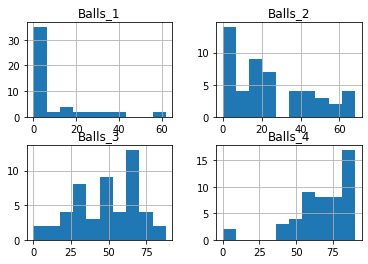

In [10]:
data.hist()

<AxesSubplot:>

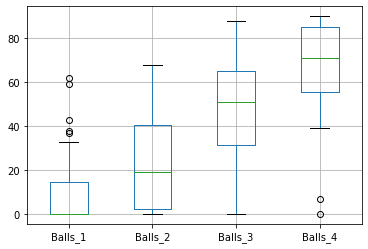

In [11]:
data.boxplot()

В общем шар_1 и шар_2 имеют околонулевые значения, т.к. бывали тиражи, где не разыгрывались 2-3 шара вместо 4-х, потому очень высокое нулевое значение.

Вынесем даты в индекс, чтобы посмотреть на распределение чисел по датам

In [12]:
data_pivot = data.pivot_table(index = 'Date', values = data[data.columns[1:5]])

In [13]:
data_pivot.sample(3)

,Balls_1,Balls_2,Balls_3,Balls_4
Date,,,,
2022-05-06,10,19,29,88
2022-03-04,0,0,28,7
2022-09-01,0,9,51,80


<AxesSubplot:xlabel='Date'>

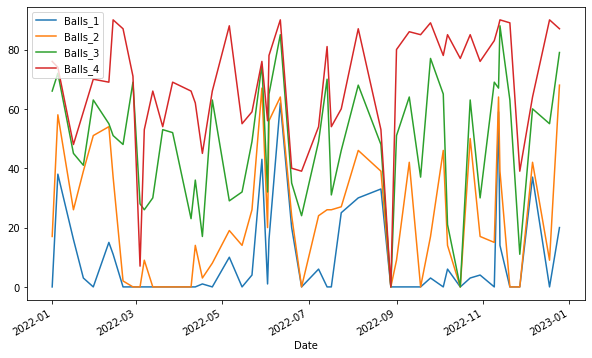

In [14]:
data_pivot.plot(figsize=(10,6))

Пока непонятно что к чему. Можно разобрать таблицу по столбцам и посчитать количество каждого неразыгранного шара. Тут-то и пригодится Counter:

In [15]:
cnt(data_pivot.Balls_1)

Counter({0: 26,
         38: 1,
         16: 2,
         3: 3,
         15: 1,
         11: 1,
         1: 2,
         10: 1,
         4: 2,
         43: 1,
         62: 1,
         20: 2,
         6: 2,
         25: 1,
         30: 1,
         33: 1,
         59: 1,
         14: 1,
         37: 1})

Выглядит хорошо, но было бы неплохо забить эти значения в отдельную таблицу. Создадим столбцы:

In [16]:
bad_balls_1 = pd.Series(cnt(data_pivot.Balls_1))

In [17]:
bad_balls_2 = pd.Series(cnt(data_pivot.Balls_2))

In [18]:
bad_balls_3 = pd.Series(cnt(data_pivot.Balls_3))

In [19]:
bad_balls_4 = pd.Series(cnt(data_pivot.Balls_4))

Альтернативный вариант:
`bad_balls_1 = data['Balls_1'].value_counts()`

Загоним столбцы в таблицу, что бы можно было объединить их по индексам (индексы сейчас - это невыпавшие шары).

После долгих мучений мне пришло в голову создать вот такого франкенштейна, засунув сериесы в датафреймы и объединив все датафреймы сразу через join() одной строчкой кода. Заодно в каждом присоединяемом датафрейме обзовём получающийся столбец, а в каждом join() укажем сортировку для того. что б числа шли от малого к большому числу. Метод `how='outer'` поможет не потерять индексы (ведь это искомые нами шары)

In [20]:
balls = pd.DataFrame(bad_balls_1, columns=['1']).join(pd.DataFrame(bad_balls_2, columns=['2']), 
                                                  how='outer', 
                                                  sort=True).join(pd.DataFrame(bad_balls_3, columns=['3']), 
                                                                               how='outer',
                                                                               sort=True).join(pd.DataFrame(bad_balls_4, columns=['4']), 
                                                                                               how='outer', 
                                                                                               sort=True)

In [21]:
balls.head()

,1,2,3,4
0,26.0,12.0,2.0,1.0
1,2.0,NaN,NaN,NaN
2,NaN,1.0,NaN,NaN
3,3.0,1.0,NaN,NaN
4,2.0,NaN,NaN,NaN


Конечно же получились пропуски, т.к. чисел много и они разные. Заменим пропуски нулями:

In [22]:
balls = balls.fillna(0)

In [23]:
balls.head()

,1,2,3,4
0,26.0,12.0,2.0,1.0
1,2.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,3.0,1.0,0.0,0.0
4,2.0,0.0,0.0,0.0


Так как нули нас не интересуют, ведь они олицетворяют выигрышные шары, то уберем этот индекс из таблицы:

In [24]:
balls.drop(labels = [0], axis=0, inplace=True)

In [25]:
balls.head()

,1,2,3,4
1,2.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,3.0,1.0,0.0,0.0
4,2.0,0.0,0.0,0.0
6,2.0,0.0,0.0,0.0


Нужны цифры без запятых, т.к запятые режут глаза:

In [26]:
balls = balls.astype('uint8') #самый лёгкий тип числовых данных, т.к. больше 90  нас цифр нет

In [27]:
balls.info()
balls.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 1 to 90
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       77 non-null     uint8
 1   2       77 non-null     uint8
 2   3       77 non-null     uint8
 3   4       77 non-null     uint8
dtypes: uint8(4)
memory usage: 924.0 bytes


,1,2,3,4
1,2,0,0,0
2,0,1,0,0
3,3,1,0,0
4,2,0,0,0
6,2,0,0,0


Нужно сложить столбцы (количество невыпадения шара, который является индексом):

In [28]:
balls['count_of_balls'] = balls['1'] + balls['2'] + balls['3'] + balls['4']

In [29]:
balls.sample(3)

,1,2,3,4,count_of_balls
3,3,1,0,0,4
15,1,1,0,0,2
9,0,3,0,0,3


Создадим итоговую таблицу плохих шаров, отсортировав значения по убыванию, что б максимальное количество невыпадений шара сномером было вверху.

In [30]:
bad_balls = balls['count_of_balls'].sort_values(ascending=False)

In [31]:
bad_balls.head()

26    5
39    5
90    4
63    4
69    4
Name: count_of_balls, dtype: uint8

Сколько ж шаров не выпадало хотя бы один раз за год?:

In [32]:
print('А не выпало за год аж', len(bad_balls), 'из 90 шаров!')

А не выпало за год аж 77 из 90 шаров!


In [33]:
bad_balls.head(20) 

26    5
39    5
90    4
63    4
69    4
54    4
64    4
66    4
17    4
85    4
14    4
3     4
24    3
20    3
30    3
48    3
51    3
53    3
55    3
9     3
Name: count_of_balls, dtype: uint8

2 шара 4 и более раз не выпали за год. 

Посмотрим распределение на графике:

<AxesSubplot:>

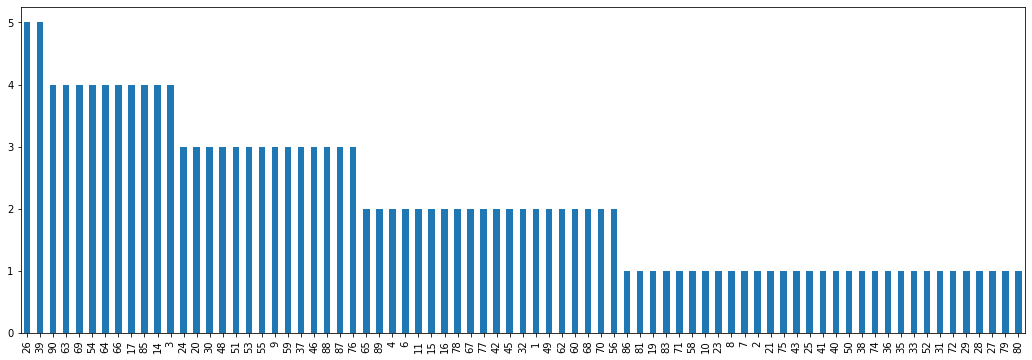

In [34]:
bad_balls.plot.bar(figsize=(18,6))

Шар под номером 26 и 39 выбирать в лотерейных билетах точно не стоит.

# Вывод

In [35]:
print(bad_balls.head(12).index)

Int64Index([26, 39, 90, 63, 69, 54, 64, 66, 17, 85, 14, 3], dtype='int64')


В общем **12 шаров, которые не стоит выбирать в лотерейных билетах** это шары под номерами: **26, 39, 90, 63, 69, 54, 64, 66, 17, 85, 14, 3**.

Берите шпаргалку и удачи в розыгрышах )

**Бонус:**

In [36]:
lucky_list = []
for i in range(1, 90):
    if i not in balls.index:
        lucky_list.append(i)


In [37]:
print(lucky_list, 'счастливые числа! Они выпадали весь год без перерыва!')

[5, 12, 13, 18, 22, 34, 44, 47, 57, 61, 73, 82, 84] счастливые числа! Они выпадали весь год без перерыва!


**5, 12, 13, 18, 22, 34, 44, 47, 57, 61, 73, 82, 84 - СЧАСТЛИВЫЕ ЧИСЛА**

Спасибо за внимание :) Это была развлекательная задача по Data Sience.

Если Вас заинтересовал такой великий специалист, как я, то пишите ***t.me/Asta7373***.